# Ames Housing - Project Deliverable 1
**ACS-5513 - Applied Machine Learning**

**Dr. Neelam Dwivedi**

**Petabyte Pirates (Team A)**

**Source:** https://www.kaggle.com/datasets/prevek18/ames-housing-dataset


In [28]:
# imports
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt

# options
pd.set_option("display.max_columns", None)

file_path = "AmesHousing.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prevek18/ames-housing-dataset",
  file_path,
)

print(df.shape)
df.head(20)

/tmp/ipython-input-28-2909984948.py:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

In [29]:
df.info(verbose=False)
df.describe().T[['mean','std','min','max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 82 entries, Order to SalePrice
dtypes: float64(11), int64(28), object(43)
memory usage: 1.8+ MB


,mean,std,min,max
Order,1.465500e+03,8.459625e+02,1.0,2.930000e+03
PID,7.144645e+08,1.887308e+08,526301100.0,1.007100e+09
MS SubClass,5.738737e+01,4.263802e+01,20.0,1.900000e+02
Lot Frontage,6.922459e+01,2.336533e+01,21.0,3.130000e+02
Lot Area,1.014792e+04,7.880018e+03,1300.0,2.152450e+05
Overall Qual,6.094881e+00,1.411026e+00,1.0,1.000000e+01
Overall Cond,5.563140e+00,1.111537e+00,1.0,9.000000e+00
Year Built,1.971356e+03,3.024536e+01,1872.0,2.010000e+03
Year Remod/Add,1.984267e+03,2.086029e+01,1950.0,2.010000e+03
Mas Vnr Area,1.018968e+02,1.791126e+02,0.0,1.600000e+03


In [30]:
# Convert 'NaN' string literals to missing values prior to missing values analysis.
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].replace("NaN", np.nan)

In [31]:
# Check the percentage of values that are missing.
# Heuristic: if > 60% of values are missing, drop these columns.
miss = df.isna().mean().sort_values(ascending=False)
miss.head(25)

,0
Pool QC,0.995563
Misc Feature,0.963823
Alley,0.932423
Fence,0.804778
Mas Vnr Type,0.605802
Fireplace Qu,0.485324
Lot Frontage,0.167235
Garage Qual,0.054266
Garage Yr Blt,0.054266
Garage Cond,0.054266


## Review suspect columns

Description: there are columns that appear to have only a few distinct values. Heuristic: if one value has >90% of the data, we will drop these columns.

In [32]:
# Just under 50% of values for Fireplace Quality are missing. View counts of records by quality.
df['Fireplace Qu'].value_counts(dropna=False)

,count
Fireplace Qu,
NaN,1422
Gd,744
TA,600
Fa,75
Po,46
Ex,43


In [33]:
# Decision: drop street
df['Street'].value_counts(dropna=False)

,count
Street,
Pave,2918
Grvl,12


In [37]:
# Decision: drop heating
df['Heating'].value_counts(dropna=False)

,count
Heating,
GasA,2885
GasW,27
Grav,9
Wall,6
OthW,2
Floor,1


In [38]:
# Decision: drop functional
df['Functional'].value_counts(dropna=False)

,count
Functional,
Typ,2728
Min2,70
Min1,65
Mod,35
Maj1,19
Maj2,9
Sev,2
Sal,2


In [34]:
# Decision: drop roof material
df['Roof Matl'].value_counts(dropna=False)

,count
Roof Matl,
CompShg,2887
Tar&Grv,23
WdShake,9
WdShngl,7
Membran,1
ClyTile,1
Roll,1
Metal,1


In [36]:
# Decision: drop electrical
df['Electrical'].value_counts(dropna=False)

,count
Electrical,
SBrkr,2682
FuseA,188
FuseF,50
FuseP,8
NaN,1
Mix,1


In [39]:
# Decision: drop utilities
df['Utilities'].value_counts(dropna=False)

,count
Utilities,
AllPub,2927
NoSewr,2
NoSeWa,1


In [35]:
numeric_cols = df.select_dtypes(include=np.number)
missing_numeric = numeric_cols.isnull().sum()

print("Missing values in numeric columns:")
print(missing_numeric[missing_numeric > 0])

Missing values in numeric columns:
Lot Frontage      490
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64


## Features with potential high impact on sale price

1.   Lot Size
1.   Year Built
1.   Overall Quality
1.   Overall Condition
1.   Lot Configuration
1.   House Style (ex. 1 Story, 2 Story)
1.   Year Remodeled (Remod / Add)
1.   Basement Features

## Engineered Features

1.   Has Basement (0, 1)
1.   Age of Home at Time of Sale (Yr Sold - Yr Built)
1.   Time Since Remodel (Yr Sold - Yr Remod or Add)
1.   Total Square Feet
1.   Total Baths (Full Bath + 0.5 * Half Bath)
1.   Total Bedrooms (Above Ground + Below Ground)



## Data Enrichment and Engineering

In [59]:
df['House Age'] = df['Yr Sold'] - df['Year Built']
df['Remodel Age'] = df['Yr Sold'] - df['Year Remod/Add']
df['Has Basement'] = df['Bsmt Qual'].notna().astype(int)
df['Total Baths'] = df['Full Bath'] + 0.5 * df['Half Bath']
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
df['Has Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})
df['Has Pool'] = df['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
df['Has Fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['Total SF Plus Garage'] = df['Total SF'] + df['Garage Area']

In [61]:
correlation_central_air = df['Has Central Air'].corr(df['SalePrice']) #drop
correlation_house_age = df['House Age'].corr(df['SalePrice'])
correlation_remodel_age = df['Remodel Age'].corr(df['SalePrice'])
correlation_total_sf = df['Total SF'].corr(df['SalePrice'])
correlation_total_baths = df['Total Baths'].corr(df['SalePrice'])
correlation_total_bedrooms = df['Bedroom AbvGr'].corr(df['SalePrice']) #drop
correlation_overall_qual = df['Overall Qual'].corr(df['SalePrice'])
correlation_overall_cond = df['Overall Cond'].corr(df['SalePrice']) #drop
correlation_has_pool = df['Has Pool'].corr(df['SalePrice']) #drop
correlation_has_fireplace = df['Has Fireplace'].corr(df['SalePrice'])
correlation_total_rooms = df['TotRms AbvGrd'].corr(df['SalePrice'])
correlation_garage_cars = df['Garage Cars'].corr(df['SalePrice'])
correlation_lot_area = df['Lot Area'].corr(df['SalePrice']) #drop
correlation_gr_liv_area = df['Gr Liv Area'].corr(df['SalePrice'])
correlation_total_sf_plus_garage = df['Total SF Plus Garage'].corr(df['SalePrice'])
correlation_garage_area = df['Garage Area'].corr(df['SalePrice'])

print("Correlation with 'Has Central Air':", correlation_central_air)
print("Correlation with 'House Age':", correlation_house_age)
print("Correlation with 'Remodel Age':", correlation_remodel_age)
print("Correlation with 'Total SF':", correlation_total_sf)
print("Correlation with 'Total Baths':", correlation_total_baths)
print("Correlation with 'Total Bedrooms':", correlation_total_bedrooms)
print("Correlation with 'Overall Qual':", correlation_overall_qual)
print("Correlation with 'Overall Cond':", correlation_overall_cond)
print("Correlation with 'Has Pool':", correlation_has_pool)
print("Correlation with 'Has Fireplace':", correlation_has_fireplace)
print("Correlation with 'Total Rooms':", correlation_total_rooms)
print("Correlation with 'Garage Cars':", correlation_garage_cars)
print("Correlation with 'Lot Area':", correlation_lot_area)
print("Correlation with 'Gr Liv Area':", correlation_gr_liv_area)
print("Correlation with 'Total SF Plus Garage':", correlation_total_sf_plus_garage)
print("Correlation with 'Garage Area':", correlation_garage_area)

Correlation with 'Has Central Air': 0.2645063996296545
Correlation with 'House Age': -0.5589068324589404
Correlation with 'Remodel Age': -0.5349400796163388
Correlation with 'Total SF': 0.7930243675148592
Correlation with 'Total Baths': 0.5807152722512321
Correlation with 'Total Bedrooms': 0.14391342840037524
Correlation with 'Overall Qual': 0.7992617947690219
Correlation with 'Overall Cond': -0.1016969321810076
Correlation with 'Has Pool': 0.08795982819450952
Correlation with 'Has Fireplace': 0.4814455261310582
Correlation with 'Total Rooms': 0.4954744168570344
Correlation with 'Garage Cars': 0.6478765953956588
Correlation with 'Lot Area': 0.26654922032842954
Correlation with 'Gr Liv Area': 0.7067799209766279
Correlation with 'Total SF Plus Garage': 0.8213166569642125
Correlation with 'Garage Area': 0.640400766987396


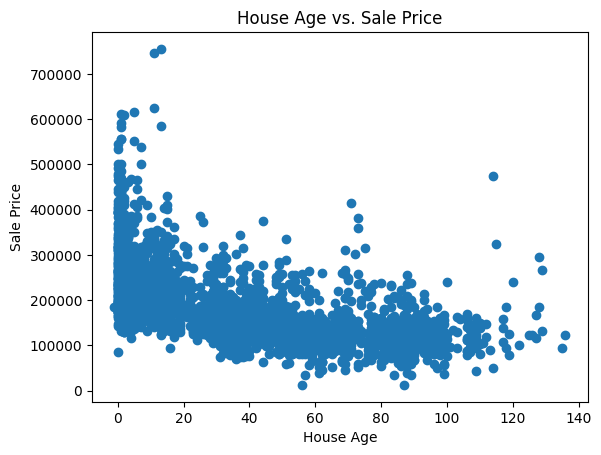

In [53]:
plt.scatter(df['House Age'], df['SalePrice'])
plt.title('House Age vs. Sale Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()

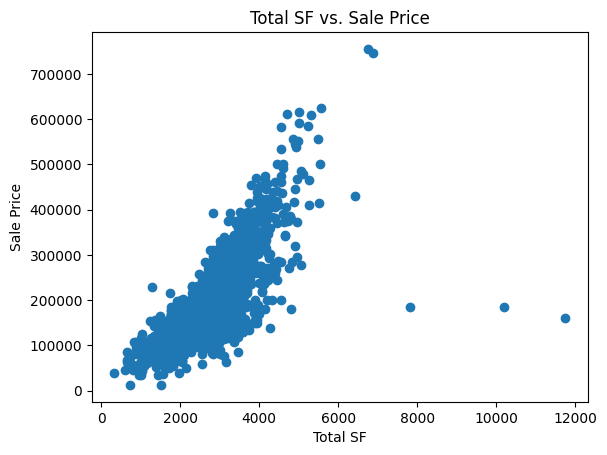

In [54]:
plt.scatter(df['Total SF'], df['SalePrice'])
plt.title('Total SF vs. Sale Price')
plt.xlabel('Total SF')
plt.ylabel('Sale Price')
plt.show()

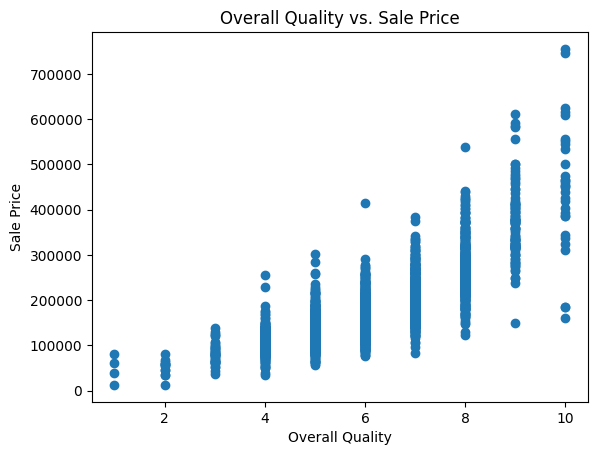

In [62]:
plt.scatter(df['Overall Qual'], df['SalePrice'])
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()